In [1]:
# Step 1: Finding the Eigenvalues and Eigenvectors of a Matrix
import numpy as np

A = np.array([[4, 0, 1],
              [-1, -6, -2],
              [5, 0, 0]])

#Step 1(a): Is the vector [1, 2, 3] an eigenvector of A? Verify your answer with a calculation in Python.
v1 = np.array([1, 2, 3]).reshape(3, 1)

A_v1 = A @ v1
lambda_v1 = np.zeros_like(A_v1, dtype=float)
non_zero_v1 = v1 != 0
lambda_v1[non_zero_v1] = A_v1[non_zero_v1] / v1[non_zero_v1]

if np.allclose(lambda_v1[non_zero_v1], lambda_v1[non_zero_v1][0]):
    expected_lambda_v1 = lambda_v1[non_zero_v1][0]
    eigenvector_v1 = True
else:
    expected_lambda_v1 = None
    eigenvector_v1 = False

print("Step 1(a)")
print("• Is v1 an eigenvector of A?", eigenvector_v1)
if eigenvector_v1:
    print("• Expected eigenvalue for v1:", expected_lambda_v1)
print("• Result of A @ v1:\n", A_v1)
print("• Lambda values for v1:\n", lambda_v1)

#Step 1(b): Is the vector [0, 1, 0] an eigenvector of A? Again, verify your answer with a calculation in Python.
v2 = np.array([0, 1, 0]).reshape(3, 1)

A_v2 = A @ v2
lambda_v2 = np.zeros_like(A_v2, dtype=float)
non_zero_v2 = v2 != 0
lambda_v2[non_zero_v2] = A_v2[non_zero_v2] / v2[non_zero_v2]

if np.allclose(lambda_v2[non_zero_v2], lambda_v2[non_zero_v2][0]):
    expected_lambda_v2 = lambda_v2[non_zero_v2][0]
    eigenvector_v2 = True
else:
    expected_lambda_v2 = None
    eigenvector_v2 = False

print("\nStep 1(b)")
print("• Is v2 an eigenvector of A?", eigenvector_v2)
if eigenvector_v2:
    print("• Expected eigenvalue for v2:", expected_lambda_v2)
print("• Result of A @ v2:\n", A_v2)
print("• Lambda values for v2:\n", lambda_v2)

#Step 1(c): Use Python to find all of the eigenvalues and eigenvectors of A.
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nStep 1(c)")
print("• Eigenvalues of A")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"  Eigenvalue {i + 1}: {eigenvalue:.1f}")

print("\n• Eigenvectors of A")
for i, eigenvector in enumerate(eigenvectors.T):
    print(f"  Eigenvector {i + 1}: {eigenvector}")

Step 1(a)
• Is v1 an eigenvector of A? False
• Result of A @ v1:
 [[  7]
 [-19]
 [  5]]
• Lambda values for v1:
 [[ 7.        ]
 [-9.5       ]
 [ 1.66666667]]

Step 1(b)
• Is v2 an eigenvector of A? True
• Expected eigenvalue for v2: -6.0
• Result of A @ v2:
 [[ 0]
 [-6]
 [ 0]]
• Lambda values for v2:
 [[ 0.]
 [-6.]
 [ 0.]]

Step 1(c)
• Eigenvalues of A
  Eigenvalue 1: -6.0
  Eigenvalue 2: 5.0
  Eigenvalue 3: -1.0

• Eigenvectors of A
  Eigenvector 1: [0. 1. 0.]
  Eigenvector 2: [ 0.69431384 -0.18935832  0.69431384]
  Eigenvector 3: [-0.18493168 -0.33287702  0.9246584 ]


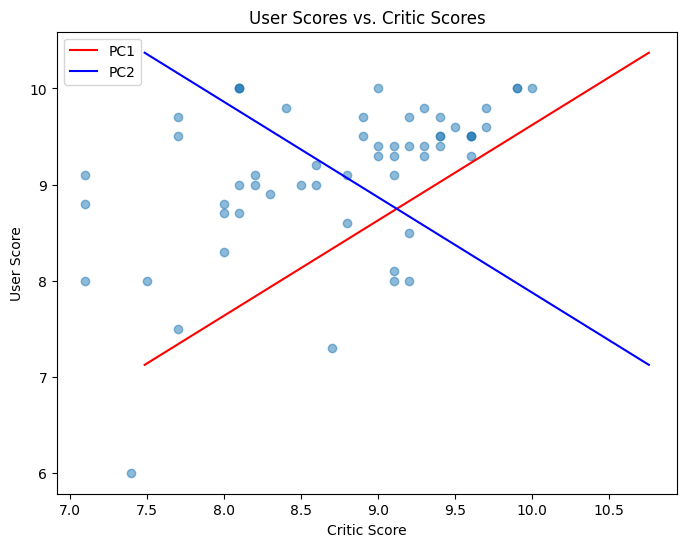

In [3]:
#Step 2: Principal Component Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('video_game_data.csv')

scores = data[['user_score', 'critic_score']]
scaler = StandardScaler()
scores_std = scaler.fit_transform(scores)

# Step 2(a): Make a scatterplot of the user scores versus critics scores.
plt.figure(figsize=(8, 6))
plt.scatter(scores['critic_score'], scores['user_score'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('User Scores vs. Critic Scores')

# Step 2(b): On your scatterplot from part (a), sketch the approximate directions of the first and second principal components. This can be done by hand or in Python.
pca = PCA(n_components=2)
pca.fit(scores_std)
pc1 = pca.components_[0]
pc2 = pca.components_[1]

mean = scores_std.mean(axis=0)
pc1_line = np.dot(np.array([[-3, 3]]).T, pc1.reshape(1, -1)) + mean
pc2_line = np.dot(np.array([[-3, 3]]).T, pc2.reshape(1, -1)) + mean

pc1_line_orig = scaler.inverse_transform(pc1_line)
pc2_line_orig = scaler.inverse_transform(pc2_line)

plt.plot(pc1_line_orig[:, 0], pc1_line_orig[:, 1], color='red', label='PC1')
plt.plot(pc2_line_orig[:, 0], pc2_line_orig[:, 1], color='blue', label='PC2')
plt.legend()
plt.show()